In [137]:
import numpy as np
from matplotlib import pyplot as plt

### Part 1)
   | | Value  | Probability    | Code   |
|---:|:-------------|:--------|:------|
| 1 | 0   | $\frac{1}{2}$ | 0   |
| 2 | 50  | $\frac{1}{32}$| 11110   | 
| 3 | 100 | $\frac{1}{8}$ | 110  |
| 4 | 150 | $\frac{1}{16}$ | 1110   |
| 5 | 200 | $\frac{1}{32}$| 11111   | 
| 6 | 250 | $\frac{1}{4}$ | 10  |

### Part 2)

In [4]:
def InformationSource(n = 28):
    out = np.zeros((n,n))
    r = np.random.randint(1, high=33, size=(out.shape))
    for i in range(n):
        for j in range(n):
            if r[i,j]>16:
                out[i,j] = 0 #1/2
            elif r[i,j]>8:
                out[i,j] = 250 #1/4
            elif r[i,j]>4:
                out[i,j] = 100 #1/8
            elif r[i,j]>2:
                out[i,j] = 150 #1/16
            elif r[i,j]>1:
                out[i,j] = 50 #1/32
            else :
                out[i,j] = 200 #1/32
    return out.astype("uint8")

In [29]:
img = InformationSource()
#print(sum(sum(img==0))/28**2) #shows probability

### Part 3)

In [48]:
def SourceEncoder(img):
    b = []
    m, n = img.shape
    for i in range(m):
        for j in range(n):
            if img[i,j]==0:
                b = b+[0]
            elif img[i,j]==250:
                b = b+[1,0]
            elif img[i,j]==100:
                b = b+[1,1,0]
            elif img[i,j]==150:
                b = b+[1,1,1,0]
            elif img[i,j]==50:
                b = b+[1,1,1,1,0]
            else :
                b = b+[1,1,1,1,1]
    return b
#print(SourceEncoder(np.array([[0,250],[50,200]]))) #for testing the function

### Part 4)

In [124]:
def SourceDecoder(b, n=28):
    l = len(b)
    img = []
    i = 0
    while(i<l):
        ones = 0
        while(b[i+ones]==1 and i+ones<l-1):
            ones += 1
        i += ones+1
        if ones==0:
            img=img+[0]
        elif ones==1:
            img=img+[250]
        elif ones==2:
            img=img+[100]
        elif ones==3:
            img=img+[150]
        elif ones==4 and b[i-1]==0:
            img=img+[50]
        else :
            img=img+[200]
            i -= (ones-5)+1
    img = np.array(img)
    img = img.reshape((n,n))
    return img.astype("uint8")
    
#SourceDecoder([1,0,1,0,0,0],2) #for checking

### Part 5)

In [133]:
N = 10
for i in range(N):
    img = InformationSource()
    bits = SourceEncoder(img)
    decoded = SourceDecoder(bits)
    temp = sum(sum(img-decoded))
    if temp == 0:
        print("Equal")
    else :
        print("Not equal")

Equal
Equal
Equal
Equal
Equal
Equal
Equal
Equal
Equal
Equal


### Part 6)

In [144]:
n = 1000
L_avg = np.zeros(n)
b_sum = 0
for i in range(n):
    img = InformationSource()
    bits = SourceEncoder(img)
    b_sum += len(bits)
    L_avg[i] = b_sum/(i+1)

L_avg final value:  1518.176440592763


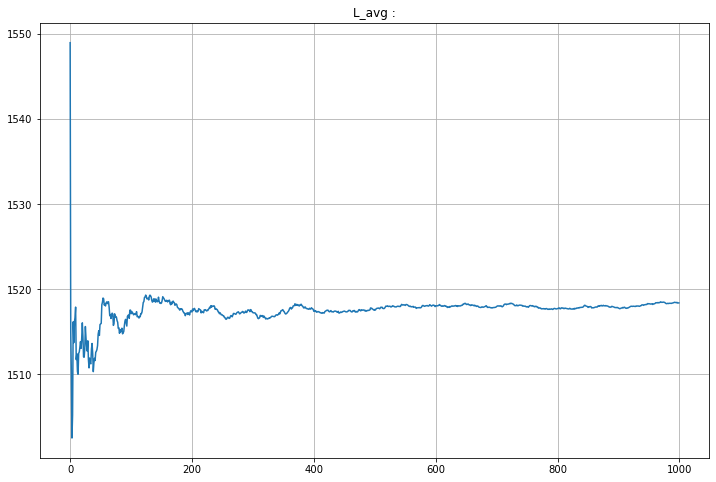

In [149]:
plt.figure(figsize=(12,8))
plt.plot(L_avg)
plt.title("L_avg :");
plt.grid()
print("L_avg final value: ",np.mean(L_avg[900:1000]))

The final vale must be around $28*28*E(l_{(x)})$ 

$E(l_{(x)}) = \sum{p_i*L_i} = \frac{1}{2}+2\frac{1}{4}+3\frac{1}{8}+4\frac{1}{16}+5\frac{1}{32}+5\frac{1}{32} = 1.9375$

$\implies L\_avg = 1519$ which is the same value from the graph